In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
file_path_active = "../data/multisocket/icon_summary_annotated_active_wait.csv"

df_active = pd.read_csv(
    file_path_active,
    delimiter=",",
    encoding="utf-8",
    header=0
)

In [4]:
file_path_passive = "../data/multisocket/icon_summary_annotated_passive_wait.csv"

df_passive = pd.read_csv(
    file_path_passive,
    delimiter=",",
    encoding="utf-8",
    header=0
)

In [5]:
df_active.head()

,nodes,taskspernode,threadspertask,iconsteps,cpufreq,slurm_job_id,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe0,elb0,ece0,ese0,ete0,empe0,emlb0,emce0,emse0,emte0,eope0,eolb0,eoce0,eose0,eote0,epe1,elb1,ece1,ese1,ete1,empe1,emlb1,emce1,emse1,emte1,eope1,eolb1,eoce1,eose1,eote1,total_time
0,1,4,24,1,1000000,61771996,0.492,0.610,0.807,0.949,0.850,0.614,0.701,0.877,0.998,0.879,0.801,0.871,0.920,0.951,0.967,0.588,0.961,0.612,0.691,0.886,0.809,0.995,0.813,0.696,1.168,0.728,0.967,0.753,0.992,0.759,0.602,0.703,0.856,0.966,0.886,0.997,0.852,1.171,1.002,1.168,0.604,0.825,0.731,0.964,0.759,98.630
1,1,4,24,100,1000000,61771997,0.640,0.949,0.675,0.826,0.817,0.834,0.967,0.863,0.949,0.909,0.767,0.981,0.782,0.870,0.899,0.706,0.960,0.735,0.911,0.807,0.888,1.000,0.888,0.934,0.951,0.794,0.960,0.828,0.975,0.849,0.705,0.948,0.744,0.922,0.807,0.924,0.990,0.934,0.982,0.951,0.763,0.958,0.797,0.939,0.849,543.857
2,1,6,16,1,1000000,61771994,0.813,0.953,0.853,0.921,0.926,0.913,0.973,0.939,0.975,0.963,0.890,0.979,0.909,0.945,0.962,0.829,0.942,0.880,0.967,0.910,0.929,0.976,0.952,0.986,0.965,0.893,0.966,0.925,0.981,0.943,0.828,0.947,0.875,0.962,0.910,0.936,0.986,0.949,0.983,0.965,0.885,0.960,0.922,0.978,0.943,106.477
3,1,6,16,100,1000000,61771995,0.681,0.875,0.779,0.905,0.860,0.806,0.892,0.904,0.978,0.924,0.845,0.981,0.861,0.925,0.931,0.732,0.948,0.772,0.905,0.853,0.877,0.985,0.890,0.913,0.975,0.835,0.963,0.867,0.991,0.874,0.733,0.922,0.795,0.932,0.853,0.925,0.960,0.964,0.988,0.975,0.792,0.960,0.825,0.944,0.874,474.000
4,1,8,12,1,1000000,61771992,0.472,0.541,0.872,0.968,0.901,0.545,0.597,0.914,0.996,0.918,0.865,0.907,0.954,0.972,0.982,0.577,0.965,0.599,0.666,0.899,0.645,0.992,0.651,0.667,0.975,0.895,0.972,0.920,0.997,0.923,0.586,0.671,0.874,0.972,0.899,0.738,0.757,0.976,1.001,0.975,0.794,0.887,0.896,0.971,0.923,122.753


In [6]:
df_active.shape

(16, 52)

In [7]:
df_passive.head()

,nodes,taskspernode,threadspertask,iconsteps,cpufreq,slurm_job_id,tpe,tlb,tce,tse,tte,tmpe,tmlb,tmce,tmse,tmte,tope,tolb,toce,tose,tote,epe0,elb0,ece0,ese0,ete0,empe0,emlb0,emce0,emse0,emte0,eope0,eolb0,eoce0,eose0,eote0,epe1,elb1,ece1,ese1,ete1,empe1,emlb1,emce1,emse1,emte1,eope1,eolb1,eoce1,eose1,eote1,total_time
0,1,4,24,1,1000000,61774930,0.812,0.942,0.862,0.944,0.913,0.910,0.953,0.955,0.989,0.966,0.892,0.989,0.902,0.954,0.945,0.818,0.961,0.851,0.960,0.887,0.947,0.993,0.954,0.961,0.993,0.865,0.969,0.893,0.999,0.893,0.835,0.944,0.884,0.997,0.887,0.972,0.975,0.997,1.004,0.993,0.859,0.968,0.887,0.993,0.893,83.791
1,1,4,24,100,1000000,61774931,0.633,0.933,0.678,0.826,0.821,0.835,0.949,0.880,0.965,0.913,0.758,0.983,0.770,0.856,0.900,0.695,0.959,0.725,0.901,0.805,0.881,1.000,0.881,0.925,0.953,0.789,0.959,0.823,0.974,0.845,0.699,0.942,0.742,0.921,0.805,0.929,0.986,0.942,0.989,0.953,0.752,0.955,0.787,0.932,0.845,547.603
2,1,6,16,1,1000000,61774928,0.823,0.948,0.868,0.943,0.920,0.899,0.957,0.939,0.981,0.957,0.916,0.991,0.924,0.961,0.961,0.836,0.944,0.886,0.978,0.906,0.934,0.968,0.965,0.990,0.975,0.895,0.975,0.918,0.988,0.929,0.834,0.947,0.880,0.972,0.906,0.935,0.971,0.963,0.987,0.975,0.892,0.975,0.914,0.985,0.929,106.309
3,1,6,16,100,1000000,61774929,0.680,0.917,0.742,0.857,0.866,0.835,0.929,0.899,0.964,0.932,0.814,0.986,0.826,0.889,0.929,0.729,0.944,0.772,0.916,0.842,0.901,0.981,0.918,0.921,0.996,0.809,0.963,0.841,0.994,0.846,0.738,0.941,0.784,0.930,0.842,0.958,0.978,0.980,0.983,0.996,0.770,0.962,0.800,0.946,0.846,479.520
4,1,8,12,1,1000000,61774926,0.865,0.956,0.905,0.959,0.943,0.932,0.966,0.964,0.989,0.975,0.928,0.989,0.938,0.970,0.967,0.874,0.971,0.900,0.971,0.926,0.955,0.997,0.958,0.976,0.981,0.915,0.974,0.939,0.995,0.944,0.875,0.949,0.922,0.996,0.926,0.953,0.974,0.978,0.997,0.981,0.918,0.973,0.943,0.999,0.944,114.668


In [8]:
df_passive.shape

(16, 52)

In [9]:
def aligned_values_from_df(dframe, tasks, column):
    vals = []
    for t in tasks:
        rows = dframe[dframe["taskspernode"] == t]
        if len(rows) == 0:
            vals.append(np.nan)
        else:
            vals.append(rows.iloc[0][column])
    return np.array(vals, dtype=float)

In [10]:
tasks = sorted(set(df_active["taskspernode"].unique()).union(set(df_passive["taskspernode"].unique())))
tasks

[4, 6, 8, 12, 16, 24, 48, 96]

In [11]:
n_steps = 100

In [12]:
# Active mode
base_rt_df_active = df_active[(df_active["iconsteps"] == 1)]
base_runtime_active = aligned_values_from_df(base_rt_df_active, tasks, "total_time")

step_df_active = df_active[(df_active["iconsteps"] == n_steps)]
total_time_arr_active = aligned_values_from_df(step_df_active, tasks, "total_time")

runtime_active = (total_time_arr_active - base_runtime_active) / (n_steps - 1)

# Passive mode
base_rt_df_passive = df_passive[(df_passive["iconsteps"] == 1)]
base_runtime_passive = aligned_values_from_df(base_rt_df_passive, tasks, "total_time")

step_df_passive = df_passive[(df_passive["iconsteps"] == n_steps)]
total_time_arr_passive = aligned_values_from_df(step_df_passive, tasks, "total_time")

runtime_passive = (total_time_arr_passive - base_runtime_passive) / (n_steps - 1)

In [13]:
def load_energy(tasks, mode, steps):
    results = []
    for task in tasks:
        path = f"../data/multisocket/icon_reports_{mode}_wait/{task}_ranks_{96 // task}_threads_1000000_hz_{steps}_steps.csv"
        if os.path.exists(path):
            df = pd.read_csv(path)
            total_energy = df.groupby("socket")["total_energy"].max().sum()
            results.append(total_energy)
        else:
            print(f"[WARN] No report for task={task} cpufreq=1000000 steps={steps}")
            results.append(np.nan)
    return np.array(results)

In [14]:
# Active mode
base_energy_active = load_energy(tasks, "active", 1)
total_energy_active = load_energy(tasks, "active", n_steps)
energy_active = (total_energy_active - base_energy_active) / (n_steps - 1)

base_energy_passive = load_energy(tasks, "passive", 1)
total_energy_passive = load_energy(tasks, "passive", n_steps)
energy_passive = (total_energy_passive - base_energy_passive) / (n_steps - 1)

In [15]:
with np.errstate(divide='ignore', invalid='ignore'):
    watt_active = np.where(runtime_active > 0, energy_active / runtime_active, np.nan)
    watt_passive = np.where(runtime_passive > 0, energy_passive / runtime_passive, np.nan)

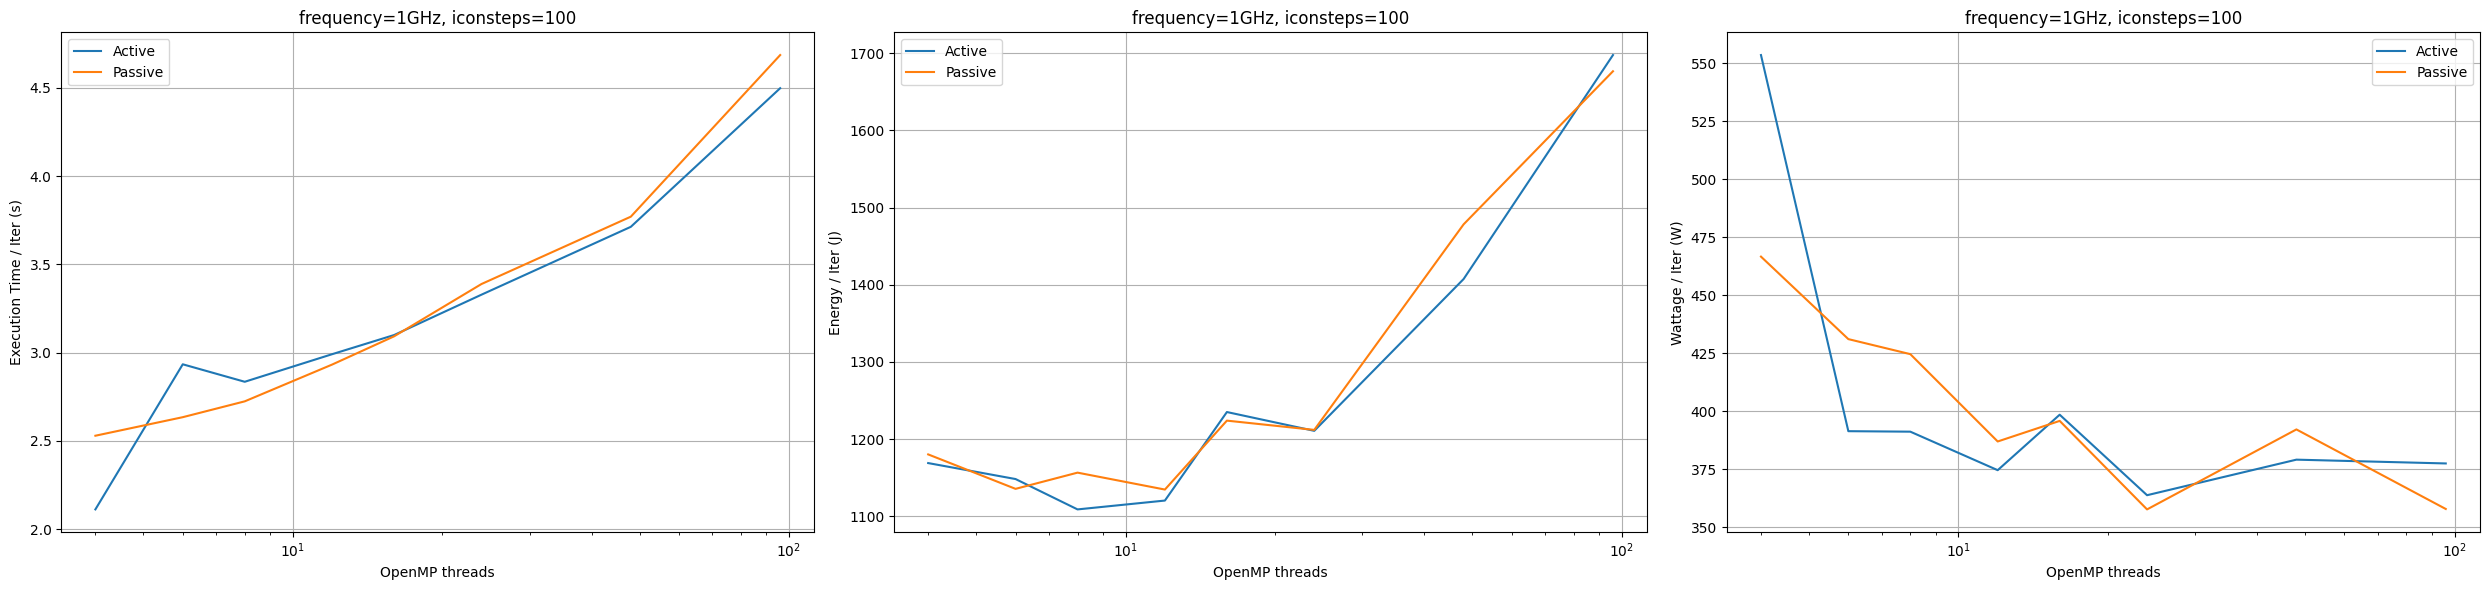

[SAVED] ../results/multisocket/icon_runtime_energy_wattage_wait_policies.png


In [16]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), squeeze=False)
outpath = "../results/multisocket/icon_runtime_energy_wattage_wait_policies.png"

# Let's concentrate on OpenMP threads
threads = tasks[::-1]

# Runtime
axs[0, 0].semilogx(threads, runtime_active, label=f"Active")
axs[0, 0].semilogx(threads, runtime_passive, label=f"Passive")
axs[0, 0].set_title(f'frequency=1GHz, iconsteps=100')
axs[0, 0].set_xlabel('OpenMP threads')
axs[0, 0].set_ylabel('Execution Time / Iter (s)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Energy
axs[0, 1].semilogx(threads, energy_active, label=f"Active")
axs[0, 1].semilogx(threads, energy_passive, label=f"Passive")
axs[0, 1].set_title(f'frequency=1GHz, iconsteps=100')
axs[0, 1].set_xlabel('OpenMP threads')
axs[0, 1].set_ylabel('Energy / Iter (J)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Power
axs[0, 2].semilogx(threads, watt_active, label=f"Active")
axs[0, 2].semilogx(threads, watt_passive, label=f"Passive")
axs[0, 2].set_title(f'frequency=1GHz, iconsteps=100')
axs[0, 2].set_xlabel('OpenMP threads')
axs[0, 2].set_ylabel('Wattage / Iter (W)')
axs[0, 2].legend()
axs[0, 2].grid(True)

plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")

In [17]:
def socket_energy_diff(path):
    df = pd.read_csv(path)
    socket_energy = df.groupby("socket")["total_energy"].max()
    diff = abs(socket_energy.iloc[0] - socket_energy.iloc[1])
    norm_diff = (socket_energy.iloc[0] - socket_energy.iloc[1]) / socket_energy.mean() * 100
    return diff, norm_diff

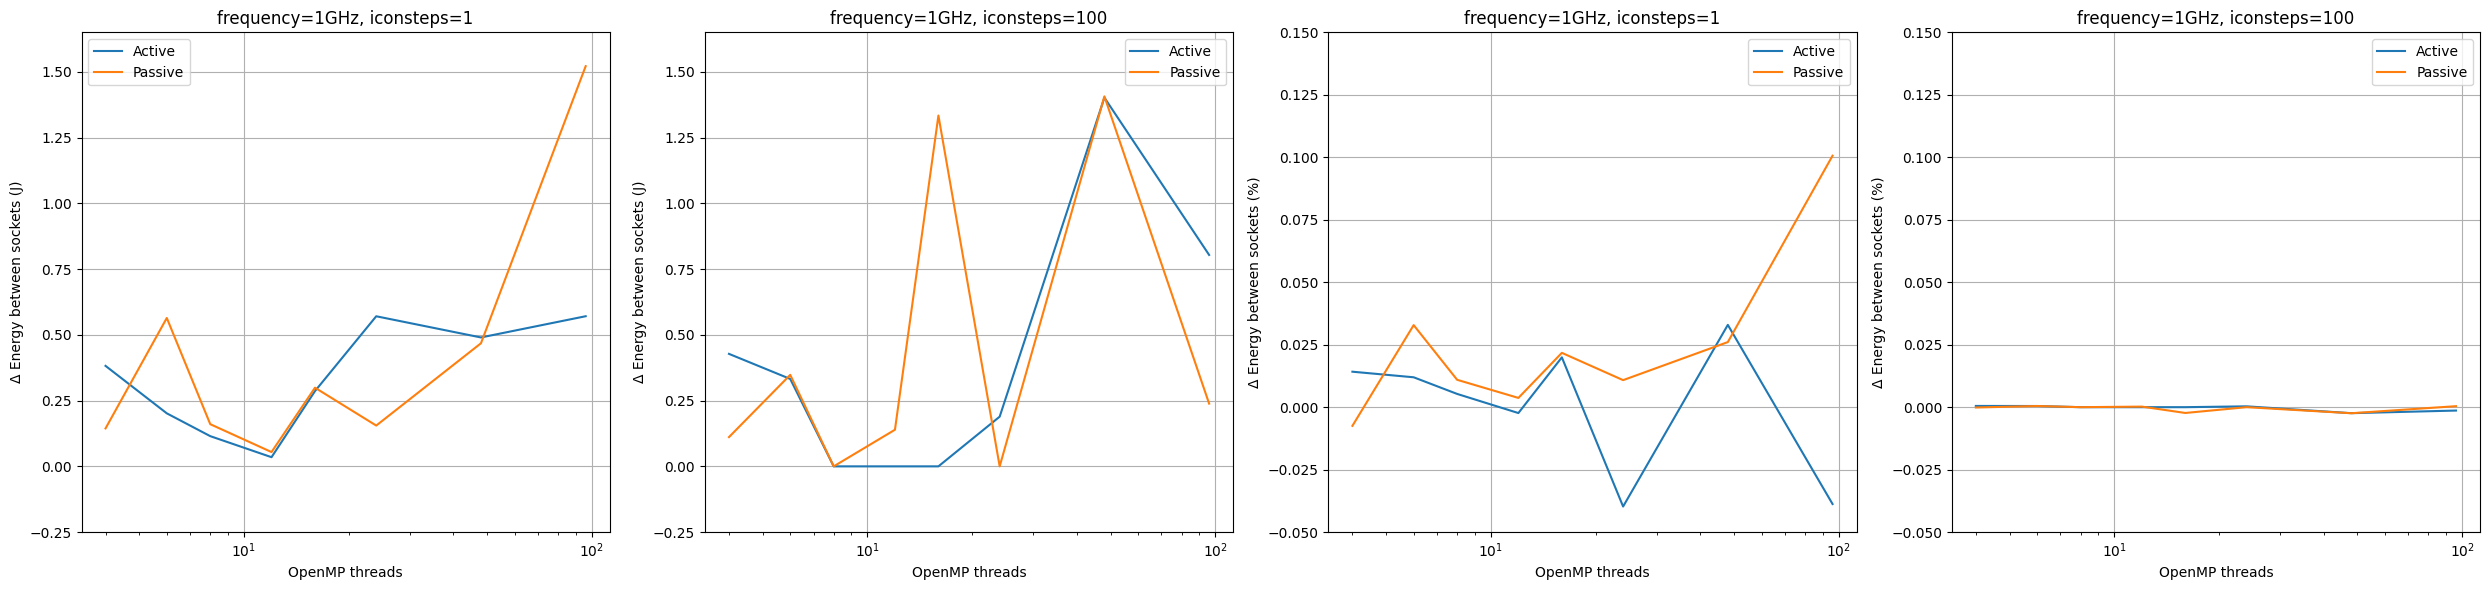

[SAVED] ../results/multisocket/icon_socket_energy_diff_wait_policies


In [18]:
fig, axs = plt.subplots(1, 4, figsize=(25, 6), squeeze=False)
outpath = "../results/multisocket/icon_socket_energy_diff_wait_policies"

for i, step in enumerate(df_active["iconsteps"].unique()):
    diff_vals_active = []
    diff_norm_vals_active = []
    diff_vals_passive = []
    diff_norm_vals_passive = []

    for task in tasks[::-1]:
        path_active = f"../data/multisocket/icon_reports_active_wait/{task}_ranks_{96 // task}_threads_1000000_hz_{step}_steps.csv"
        path_passive = f"../data/multisocket/icon_reports_passive_wait/{task}_ranks_{96 // task}_threads_1000000_hz_{step}_steps.csv"
    
        if not (os.path.exists(path_active) and os.path.exists(path_passive)):
            print(f"[WARN] Missing data for task={task}, step={step}")
            diff_vals_active.append(np.nan)
            diff_vals_passive.append(np.nan)
            diff_norm_vals_active.append(np.nan)
            diff_norm_vals_passive.append(np.nan)
            continue

        d_act, dn_act = socket_energy_diff(path_active)
        d_pas, dn_pas = socket_energy_diff(path_passive)
                
        diff_vals_active.append(d_act)
        diff_norm_vals_active.append(dn_act)
        diff_vals_passive.append(d_pas)
        diff_norm_vals_passive.append(dn_pas)

    axs[0, i].semilogx(threads, diff_vals_active, label=f"Active")
    axs[0, i].semilogx(threads, diff_vals_passive, label=f"Passive")
    axs[0, i].set_title(f"frequency=1GHz, iconsteps={step}")
    axs[0, i].grid(True)
    axs[0, i].set_xlabel("OpenMP threads")
    axs[0, i].set_ylabel("Δ Energy between sockets (J)")
    axs[0, i].set_ylim([-0.25, 1.65])
    axs[0, i].legend()
    
    axs[0, i+2].semilogx(threads, diff_norm_vals_active, label=f"Active")
    axs[0, i+2].semilogx(threads, diff_norm_vals_passive, label=f"Passive")
    axs[0, i+2].set_title(f"frequency=1GHz, iconsteps={step}")
    axs[0, i+2].grid(True)
    axs[0, i+2].set_xlabel("OpenMP threads")
    axs[0, i+2].set_ylabel("Δ Energy between sockets (%)")
    axs[0, i+2].set_ylim([-0.05, 0.15])
    axs[0, i+2].legend()
    
plt.tight_layout()
plt.savefig(outpath, dpi=300)
plt.show()
print(f"[SAVED] {outpath}")